<img src='https://i.imgur.com/oekPbLv.png' align='left' width="200">
<h1 style="text-align: left;">Social Inno Fest 2018 - AISG</h1>
<h3 style="text-align: left;">Computer Vision Crash Course</h3>
This Jupyter Notebook serves the purpose of providing the workshop participants with some Python helper scripts/functions to utilise the AI services through the APIs. This notebook can be downloaded from [here](https://gist.github.com/ryzalk/9b98adc5e64cd38d4179aa959f6f00a8).

**[Slides for accompaniment](https://docs.google.com/presentation/d/174MjrJggxTuPq0AsZxNq81IIGcOcEXTjIZU0tiBn4_o/edit?usp=sharing)**

# Democratisation of AI Services
There now exist many platforms offering APIs for computer vision services. This translates to the ease of access for such services as the most layman of users are able to tap on to such services with minimal coding. This session covers some of the API services that are available under the Microsoft Azure's Cognitive Services suite.

# Microsoft Computer Vision API
What we are going to do in this session is to tap on the Computer Vision service on Azure for the identification and recognition of objects or personalities. This service is able to analyse an image and try to recognise common objects while locating faces within it, even identifying it if the service is able to recognise that face.

To be provided with the Computer Vision API service, one has to make sure that there exist an Azure account that would allow access to the platform's services. Once this is done, we can start logging in into the the portal at https://portal.azure.com. Follow the steps indicated in the [slides](https://docs.google.com/presentation/d/1FnS9m048oK6gUlBsnOiT8PxpgFgP1w5jwSl2TAtOARQ/edit?usp=sharing) to gain access to the **Computer Vision** service.

### Initialising variables for keys
So this is where we get the API keys from the portal and assign them to the variables below so that we can use them when communicating with the API.

In [28]:
# Create variables for API endpoint and key
azure_cv_endpoint = 'INSERT YOUR ENDPOINT URL HERE'
azure_cv_key = 'INSERT YOUR KEY HERE'

### Choosing an image
Now that we have initialised our endpoint and key, we can begin the next step with choosing a picture that we would like to test out this service with. This service allows us to upload either an image from our local system or through a URL. For the sake of this demonstration, we'd go ahead with a URL.

In [3]:
# To show images under the same 'line'
%matplotlib inline

# Importing libraries to 'plot' the image that we are looking into
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO

# Initialise a variable to store the image URL
test_img_url = 'https://img.taste.com.au/LHfi_7cR/w1200-h630-cfill/taste/2016/11/flourless-chocolate-hazelnut-cake-50137-1.jpeg'

So after all of the above, we go ahead with displaying in this notebook the image we are trying analyse.

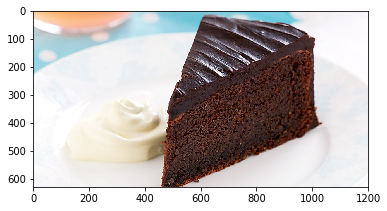

In [4]:
# Get the image and show it
response = requests.get(test_img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

### Creating a helper function to use the API
In order to communicate with the API and retrieve results from it, we need to create a function that allows us to do that. The helper function can actually be found [here](https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa#python).

In [16]:
def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': azure_cv_key,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })
    
    # Passing URL for image to server
    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(azure_cv_endpoint)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)

### Using the service
Now that we have created the helper function above, we are going to send the URL of the chosen image to the service, and from the service we would garner results. The results that we are provided with is in JSON format.

In [17]:
jsonData = get_image_features(test_img_url)
print(jsonData)

{'categories': [{'name': 'others_', 'score': 0.02734375}], 'description': {'tags': ['cake', 'plate', 'piece', 'chocolate', 'table', 'slice', 'food', 'fork', 'sitting', 'white', 'ice', 'cream', 'dessert', 'eaten'], 'captions': [{'text': 'a piece of chocolate cake on a plate', 'confidence': 0.9047894235221523}]}, 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White', 'Brown'], 'accentColor': 'B05B1B', 'isBwImg': False}, 'requestId': '55d8c787-a787-4f49-9256-5d53950b8d5a', 'metadata': {'height': 630, 'width': 1200, 'format': 'Jpeg'}}


As you can see from above, the service is able to provide one with information pertaining to which category the object might fit under, its description, and also colour. However, is there a way to get concise results?

In [18]:
desc = jsonData['description']['captions'][0]['text']
print(desc)

a piece of chocolate cake on a plate


### TA-DA!
That's all there is to the picture! Just a piece of chocolate cake, that's on a plate (though we have missed some details of the image). Now, what if we use another picture with a recogniseable face, and layers of things to be identified.

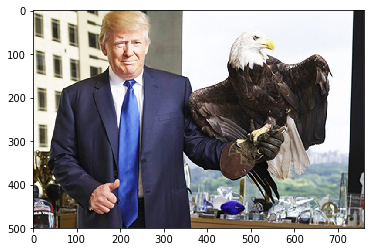

In [26]:
# Initialise a new variable for new image
test_img_url_2 = 'http://cdn.ppcorn.com/wp-content/uploads/sites/14/2015/12/Donald-Trump-Get-Owned-by-a-Giant-Bird-ppcorn-760x500.jpg'
# Get the image and show it
response = requests.get(test_img_url_2)
img = Image.open(BytesIO(response.content))
imshow(img)

In [25]:
jsonData2 = get_image_features(test_img_url_2)
print('JSON output:')
print(jsonData2)
print('\n')
desc2 = jsonData2['description']['captions'][0]['text']
print(desc2)

JSON output:
{'categories': [{'name': 'people_', 'score': 0.6015625, 'detail': {'celebrities': [{'faceRectangle': {'top': 52, 'left': 174, 'width': 89, 'height': 89}, 'name': 'Donald Trump', 'confidence': 0.9804430603981018}]}}, {'name': 'people_group', 'score': 0.25390625, 'detail': {'celebrities': [{'faceRectangle': {'top': 52, 'left': 174, 'width': 89, 'height': 89}, 'name': 'Donald Trump', 'confidence': 0.9804430603981018}]}}], 'description': {'tags': ['person', 'man', 'suit', 'standing', 'outdoor', 'bird', 'front', 'woman', 'eagle', 'looking', 'couple', 'hand', 'holding', 'people', 'walking', 'table', 'bench', 'group'], 'captions': [{'text': 'Donald Trump in a suit standing in front of a bird', 'confidence': 0.9783539996924305}]}, 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White', 'Black', 'Grey'], 'accentColor': '3A5691', 'isBwImg': False}, 'requestId': 'b6c1644d-f999-4a57-8a04-e9f3dd027096', 'metadata': {'height': 500, '

### What's next?
As you can see, it's pretty simple to utilise AI tools through such services. Now that you have been introduced to these tools, think about the possibilities of incorporating them for your solutions :)